# Regresión Logística

En estadística, la regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras.\n

### Autores
* Efrén Jiménez

## Análisis del Problema
Cuando sucede un accidente en un medio de transporte colectivo de gran tamaño como un barco o un avión, una de las situaciones más sensibles es cómo saber las posibilidades de que un pasajero sobreviva. En el caso del Titanic, ya no hay nada que se pueda hacer sobre los pasajeros, no hay decisión que se pueda tomar. Sin embargo, la forma en que se van a manejar los datos para determinar si un pasajero sobrevivió o no se puede transportar a otros escenarios actuales.
"Al momento en que sucede un accidente, conforme se empiecen a encontrar los primeros sobrevivientes y los primeros cuerpos, podríamos comenzar a crear un modelo que permita predecir las probabilidades de otros pasajeros de haber sobrevivido. Esto podría ayudar en el momento a los cuerpos de rescate a saber qué es necesario tener en la escena del accidente, para poder reaccionar inmediatamente ante cualquier situación.
![titanic](https://i.ibb.co/QpJyhmN/titanic.png)



In [1]:
system("pip3 install kb-python")
system("wget https://github.com/pachterlab/kallisto/releases/download/v0.46.1/kallisto_linux-v0.46.1.tar.gz")
untar("kallisto_linux-v0.46.1.tar.gz")
system("cp kallisto/kallisto /usr/local/bin")

In [2]:
install.packages("titanic")
install.packages("lattice")
install.packages("caTools")
install.packages("ROCR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gplots’




## Entendimiento de los Datos


El conjunto de datos que se va a analizar cuenta con 891 observaciones y 12 variables:
- PassengerID: Número de pasajero; numérico, rango de 1 a 891.
- Survived: Indica si el pasajero sobrevivió o no; valores posibles: 0 (no), 1 (sí).
- Pclass: Clase en la cual viajaba el pasajero; valores posibles: 1, 2 ó 3.
- Name: Nombre del pasajero; variable cualitativa categórica.
- Sex: Género del pasajero; valores posibles: male (hombre) y female (mujer).
- Age: Edad del pasajero; rango: 0.42 a 80 años, con 177 valores faltantes.
- SibSp: Cantidad de hermanos o cónyuges en el barco; numérica, rango de 0 a 8.
- Parch: Cantidad de hij@s o padres a bordo; numérica, rango de 0 a 6.
- Ticket: Número de tiquete; variable cualitativa categórica.
- Fare: Monto pagado por el pasajero por su tiquete; rango: de 0 a 512.33.
- Cabin: Cabina en la cual esaba hospedado el pasajero; variable cualitiva categórica.
- Embarked: Puerto en el cual embarcó el pasajero; variable cualitiva categórica.

In [25]:
#librerías utiliadas (puede que necesiten instalar una o más de estas librerías, en ese caso, utilicen install.packages)
options(warn=-1)
library(titanic)
library(lattice)
library(caTools)
library(ROCR)

In [4]:
data(titanic_train)
data(titanic_test)
#crear factores
titanic_train$Survived <- factor(titanic_train$Survived)
titanic_train$Pclass <- factor(titanic_train$Pclass)
titanic_train$Sex <- factor(titanic_train$Sex)
titanic_train$Cabin <- factor(titanic_train$Cabin)
titanic_train$Embarked <- factor(titanic_train$Embarked)
str(titanic_train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [5]:
#Dividir el conjunto de datos en entrenamiento y prueba
set.seed(351)
splt <- sample.split(titanic_train$Survived, SplitRatio = 0.7)
datos.entrenamiento <- titanic_train[splt,]
datos.prueba <- titanic_train[!splt,]

Una vez cargados los datos, podemos comenzar a explorarlos. Para comenzar, podemos analizar la distribución
de la variable Edad, en el contexto de si el pasajero sobrevivió o no:

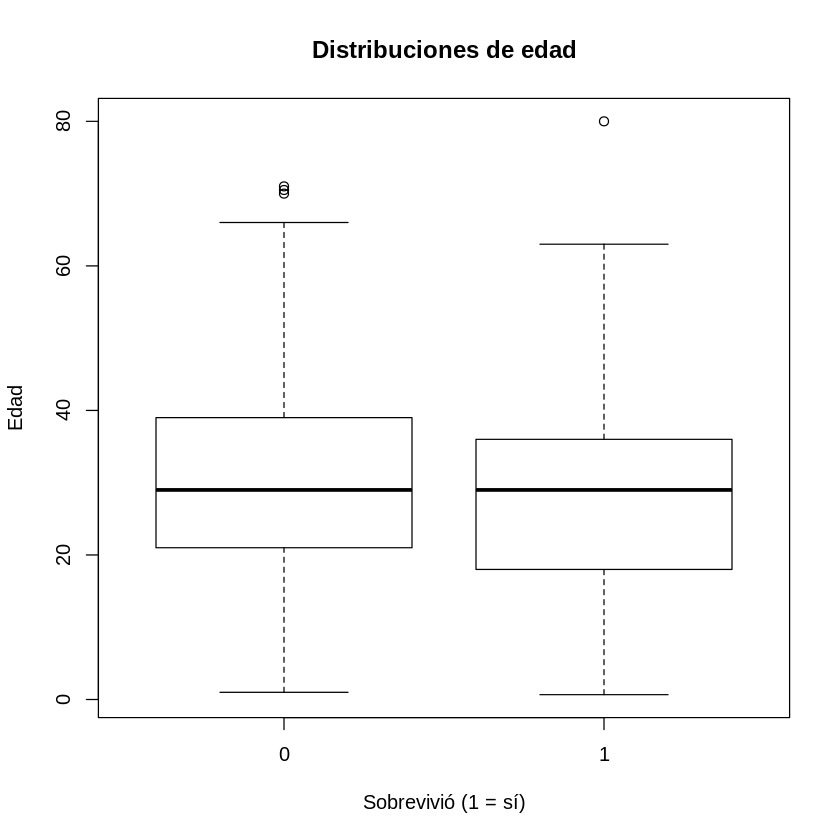

In [6]:
boxplot(datos.entrenamiento$Age ~ datos.entrenamiento$Survived,
main = 'Distribuciones de edad',
ylab = 'Edad',
xlab = 'Sobrevivió (1 = sí)')

Del gráfico anterior, podemos concluir que hubo sobrevivientes y víctimas en diferentes rangos de edades, y
que no se aprecia un patrón dictado por la edad que favorezca al a sobrevivir el accidente. Alternativamente,
podemos comparar proporciones entre los sobrevivientes y el genero:

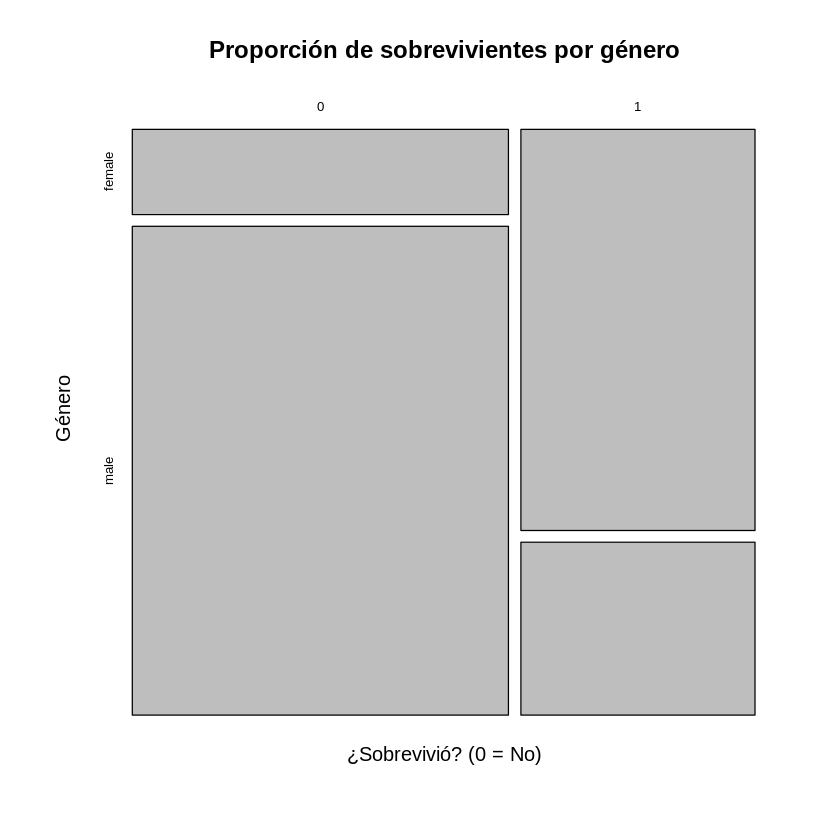

In [7]:
mosaicplot(~datos.entrenamiento$Survived + datos.entrenamiento$Sex,
main = 'Proporción de sobrevivientes por género',
ylab = 'Género',
xlab = '¿Sobrevivió? (0 = No)')

En el gráfico de mosaico arriba, podemos apreciar cómo hay un mayor número de víctimas masculinas,
complementado por una gran cantidad de mujeres sobrevivientes.
Dada la época en la cual sucedió el accidente del Titanic, también es importante analizar la proporción de
sobrevivientes por clase en la cual viajaba:

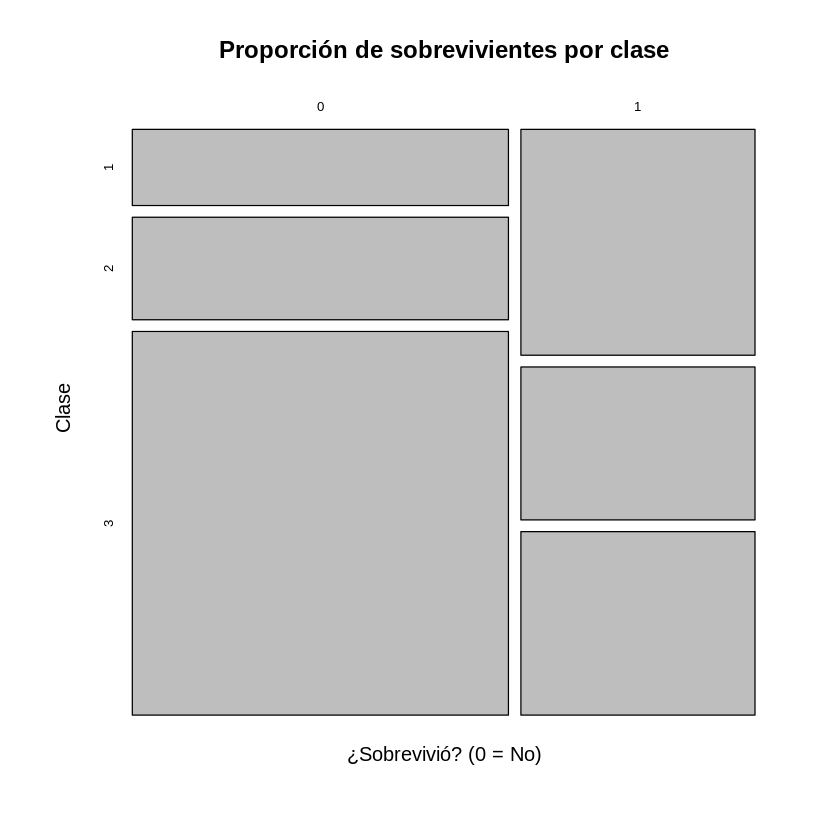

In [8]:
mosaicplot(~datos.entrenamiento$Survived + datos.entrenamiento$Pclass,
main = 'Proporción de sobrevivientes por clase',
ylab = 'Clase',
xlab = '¿Sobrevivió? (0 = No)')

En el gráfico anterior, se puede apreciar cómo la mayoría de personas que no sobrevivió viajaba en tercera
clase , mientras que la proporción de sobrevivientes la domina la gente que iba en primera clase.
Adicionalmente, se puede analizar la interacción de variables como el género y la edad, para ver si a pesar de
que la edad no parece ser importante por sí sola para determinar quién sobrevivió, pero talvez en combinación
con el género sí pueda ser interesante.

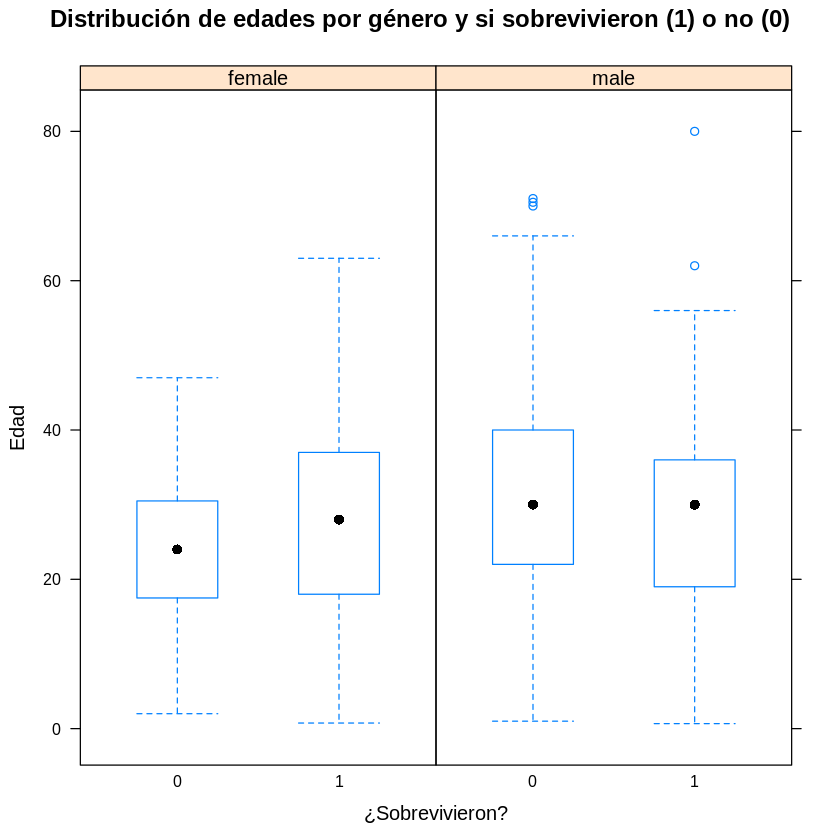

In [9]:
bwplot(datos.entrenamiento$Age ~ datos.entrenamiento$Survived | datos.entrenamiento$Sex,
main = 'Distribución de edades por género y si sobrevivieron (1) o no (0)',
xlab = '¿Sobrevivieron?',
ylab = 'Edad')

Del gráfico anterior, se puede observar una mayor tendencia de hombres de mayor edad y mujeres de menos
edad a no sobrevivir, por lo cual no vamos a descartar la variable de la edad a la hora de hacer el gráfico.
Para terminar, podemos ver la proporción de sobrevivientes de acuerdo con su punto de embarque:

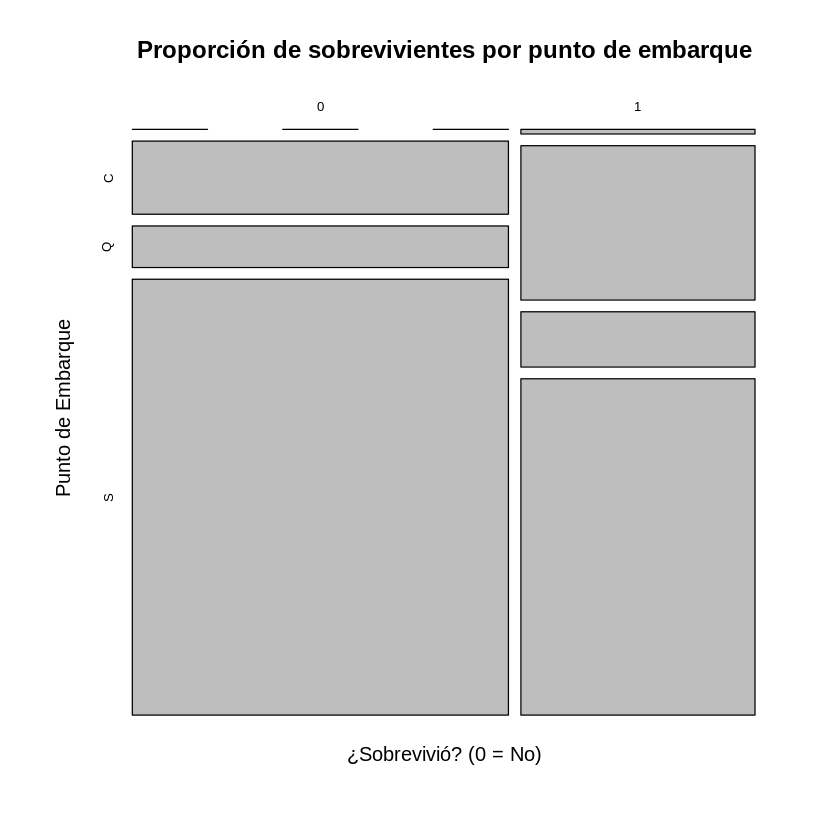

In [10]:
mosaicplot(~datos.entrenamiento$Survived + datos.entrenamiento$Embarked,
main = 'Proporción de sobrevivientes por punto de embarque',
ylab = 'Punto de Embarque',
xlab = '¿Sobrevivió? (0 = No)')

A primera vista, se puede apreciar cómo ambos valores (sobrevivieron y no sobrevivieron) son dominados
por las observaciones del punto de embarque “S”. Esto tiene mucho sentido porque, según la segunda tabla
abajo, la mayoría de las personas embarcó en este punto (72%, o 450 observaciones de 623). Lo que sí resulta
interesante es ver cómo la mayoría de las personas que embarcaron en el punto “C”, según la tercera table
abajo, sobrevivió: 57%, comparado con menos del 46% en los otros dos puntos de embarque, obviando las 2
observaciones para las cuales no se tiene esa información.

In [11]:
table(datos.entrenamiento$Embarked)


      C   Q   S 
  2 118  53 450 

In [12]:

round(table(datos.entrenamiento$Embarked)/nrow(datos.entrenamiento)*100,2)


          C     Q     S 
 0.32 18.94  8.51 72.23 

In [13]:
round(table(datos.entrenamiento$Embarked, datos.entrenamiento$Survived)/
rowSums(table(datos.entrenamiento$Embarked, datos.entrenamiento$Survived))*100,2)

   
         0      1
      0.00 100.00
  C  43.22  56.78
  Q  54.72  45.28
  S  67.56  32.44

## Modelo de Minería de Datos

Para modelar este caso, se va a utilizar una regresión logística, dejando de lado columnas como el identificador
del pasajero, el nombre, el número de tiquete y el número de cabina en la cual estuvo hospedado el pasajero:

In [14]:
titanic.fit <- glm(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked,
data = datos.entrenamiento,
family = binomial)

Al ver los detalles del modelo:

In [15]:
summary(titanic.fit)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare + Embarked, family = binomial, data = datos.entrenamiento)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7717  -0.6390  -0.3591   0.5515   2.5430  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  16.690641 608.038382   0.027  0.97810    
Pclass2      -1.148664   0.402096  -2.857  0.00428 ** 
Pclass3      -2.586663   0.430218  -6.012 1.83e-09 ***
Sexmale      -2.585890   0.273213  -9.465  < 2e-16 ***
Age          -0.043615   0.010350  -4.214 2.51e-05 ***
SibSp        -0.340159   0.162014  -2.100  0.03577 *  
Parch         0.031517   0.155045   0.203  0.83892    
Fare          0.001685   0.003663   0.460  0.64538    
EmbarkedC   -12.220417 608.038168  -0.020  0.98397    
EmbarkedQ   -12.647053 608.038463  -0.021  0.98341    
EmbarkedS   -12.762141 608.038140  -0.021  0.98325    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Disp

Se puede observar que hay muchas variables que no son significativas: el punto de embarque, el monto pagado
por el tiquete y la cantidad de padres / hijos a bordo, así que se procede a hacer un segundo modelo sin estas
variables:

In [52]:
titanic.fit <- glm(Survived ~ Pclass + Sex + Age,
data = datos.entrenamiento,
family = binomial,na.action = na.exclude)
summary(titanic.fit)


Call:
glm(formula = Survived ~ Pclass + Sex + Age, family = binomial, 
    data = datos.entrenamiento, na.action = na.exclude)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7964  -0.6521  -0.3624   0.5920   2.5488  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.969399   0.501086   7.922 2.35e-15 ***
Pclass2     -1.369490   0.342989  -3.993 6.53e-05 ***
Pclass3     -2.815590   0.356925  -7.888 3.06e-15 ***
Sexmale     -2.567617   0.255997 -10.030  < 2e-16 ***
Age         -0.039885   0.009738  -4.096 4.21e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 669.68  on 495  degrees of freedom
Residual deviance: 429.77  on 491  degrees of freedom
  (127 observations deleted due to missingness)
AIC: 439.77

Number of Fisher Scoring iterations: 5


En este segundo modelo, todas las variables son significativas, y el AIC bajó de 443 a 437. Tenemos suficiente
evidencia de que el segundo modelo es mejor que el primero a nivel estadístico.
Con respecto a la interpretación de coeficientes, se puede decir que:

- El logaritmo de las posibilidades de los pasajeros de 2da y 3ra clase es menor que el de los pasajeros de
primera clase.
- La probabilidad de sobrevivir es menor para los hombres.
- En general, a mayor edad y cantidad de hermanos / espos@s, menor probabilidad de sobrevivir.

## Evaluación
A manera de modelo ingenuo, podemos tener un modelo que prediga que nadie sobrevivió al Titanic, pues
es el resultado más frecuente. Dicho modelo tendría una exactitud del 61.58% (165 aciertos de 268 en el
conjunto de pruebas).

In [17]:
table(datos.entrenamiento$Survived)


  0   1 
384 239 

In [18]:
table(datos.prueba$Survived, rep(0, nrow(datos.prueba)))

   
      0
  0 165
  1 103

Al generar las predicciones del modelo sobre el conjunto de pruebas, tenemos las siguientes métricas según la
tabla abajo (usando 0.5 como umbral de discriminación):

- Exactitud: 63.81%
- Sensibilidad: 70.79%
- Especificidad: 83.72%
- Área bajo la curva: 82.96%

In [45]:
predicciones <- predict(titanic.fit, newdata = datos.prueba, type = 'response')
data<-table(datos.prueba$Survived, predicciones >= 0.5)

*Notas Importantes*:

![Proceso ROC](https://i.ibb.co/QHhTvHn/matriz-de-confusi-n.png)

En general, podemos sacar las siguientes métricas a partir de la tabulación anterior:

\begin{equation}Exactitud=\frac{VP+VN}{Total}\end{equation}

In [20]:
#Exactitud:
#(108 + 63) / nrow(datos.prueba)
print((data[1,1]+data[2,2]) / sum(data) )

[1] 0.7844037


\begin{equation}\text{Sensibilidad}=\frac{VP}{\text{Total Positivos}}\end{equation}

In [21]:
#Sensibilidad:
#63 / (63 + 26)
print( data[1,1] /(data[1,1]+data[1,2]))

[1] 0.8372093


\begin{equation}\text{Precisión}=\frac{VP}{\text{Total clasificados positivos}}\end{equation}

In [22]:
print(data[1,1] /(data[1,1]+data[2,1] ))

[1] 0.8059701


\begin{equation}\text{Especificidad}=\frac{VN}{\text{Total Negativos}}\end{equation}

In [27]:
print( data[2,2] /(data[1,2]+data[2,2]))

[1] 0.75


In [61]:

predicciones <- predict(titanic.fit, newdata = datos.prueba)
predicciones = ifelse(is.na(predicciones), 0,predicciones)
predicciones

1            4            8            9           11           12 
-2.291274913  2.573429105 -1.493577959  0.076917947  0.994269444  1.656077608 
          14           17           19           28           30           36 
-2.969317324 -1.493577959 -0.082621444  0.643969569  0.000000000 -0.273381928 
          40           49           51           58           61           64 
 0.595420967  0.000000000 -1.693002198 -2.550526423 -2.291274913 -1.573347655 
          66           70           72           81           90           93 
 0.000000000 -2.450814304  0.515651272 -2.291274913 -2.371044608 -0.432921319 
          94           95           97          100          102          112 
-2.450814304 -3.767014278 -1.430042511 -1.323793571  0.000000000  0.575478543 
         114          118          120          122          123          125 
 0.356111881 -1.124369333  1.074039139  0.000000000 -1.263966300 -0.752000100 
         126          128          135          143          144          146 
-1.892426436 -2.371044608 -0.964829942  0.196572490 -2.171620370 -0.725520856 
         147          149          152          153          155          161 
-2.490699152 -1.423505690  3.091932125 -3.627417311  0.000000000 -3.168741562 
         167          168          169          171          173          174 
 0.000000000 -0.641009311  0.000000000 -1.031194034  1.113923987 -2.251390065 
         175          176          178          179          183          189 
-0.831769796 -2.131735522  1.975156389 -1.164254180 -1.772771893 -3.009202171 
         191          192          195          196          205          212 
 1.323593223 -0.725520856  2.214465475  1.656077608 -2.131735522  1.203938680 
         213          215          222          225          235          242 
-2.291274913  0.000000000 -1.044599637 -0.113842537 -0.924945094  0.000000000 
         243          257          260          262          263          271 
-1.124369333  0.000000000  0.605665965 -1.533462807 -0.672230405  0.000000000 
         273          277          280          288          290          291 
 0.964629594 -0.641009311 -0.242160834 -2.291274913  0.276342186  2.932392734 
         293          306          311          314          316          319 
-1.403563266  1.365087615  3.012162429 -2.530583999  0.116802795  2.732968495 
         322          324          328          329          330          331 
-2.490699152  1.722441700  1.164053832 -0.082621444  3.331241211  0.000000000 
         333          336          342          344          348          349 
-0.113842537  0.000000000  3.012162429 -0.964829942  0.000000000 -1.533462807 
         350          352          361          362          363          365 
-3.088971867  0.000000000 -3.009202171 -1.124369333 -0.641009311  0.000000000 
         366          367          368          369          371          374 
-2.610353695  1.576307912  0.000000000  0.000000000  0.404660483  0.524315026 
         375          377          378          380          381          387 
 1.034154292  0.276342186  0.324890787 -2.171620370  2.294235171 -1.453693112 
         388          396          400          401          402          407 
 1.164053832 -2.291274913  1.483132614 -2.969317324 -2.450814304 -3.447935496 
         408          409          413          415          425          426 
-0.087363293 -2.251390065  2.653198800 -3.168741562 -2.131735522  0.000000000 
         429          431          433          436          438          439 
 0.000000000  0.285005940  0.924744746  3.411010906  1.642672005 -1.150848577 
         445          451          453          455          456          460 
 0.000000000 -1.403563266  0.205236244  0.000000000 -2.570468847  0.000000000 
         461          462          464          469          474          475 
-0.512691014 -2.769893085 -1.882181439  0.000000000  1.682556852  0.276342186 
         477          479          480          484          

[1] 0.7873786

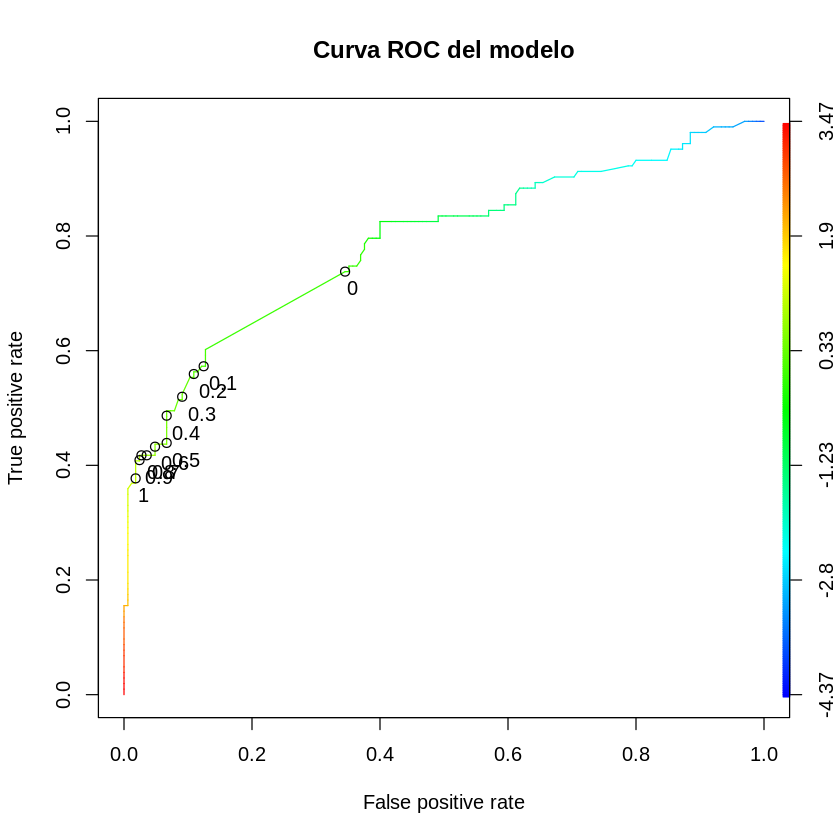

In [62]:
prediccionesROC=prediction(c(predicciones),c(datos.prueba[,'Survived']))
as.numeric(performance(prediccionesROC, "auc")@y.values)
plot(performance(prediccionesROC, "tpr", "fpr"),
colorize = T,
print.cutoffs.at=seq(0,1,by=0.1),
text.adj=c(-0.2,1.7),
main = 'Curva ROC del modelo')

## Resultados

En general, los resultados del modelo son considerablemente buenos, pero tambien representa que alrededor del 18% del error puede provocar graves problemas por que, se le estaria aceverando a las familias que existe la posibilidad que su pariente este vivo cuando hay un 18% DE probabilidad de que este muerto.